<a href="https://colab.research.google.com/github/prinakk/ML_UTS2019_ASSIGNEMT2/blob/master/SAFEynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/prinakk/ML_UTS2019_ASSIGNEMT2

# Introduction

# Initialisation

In [0]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Other
from IPython.display import Image
import configparser
import gc # clear RAM
import subprocess
import warnings
import pprint
import time
import os

In [2]:
os.getcwd()

'/content'

In [3]:
print(os.listdir('/content'))

['.config', 'test.csv', 'train.csv', 'sample_data']


In [0]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# formata os dados de todas as tabelas (ponto flutuante com 2 casas)
pd.options.display.float_format = '{:.2f}'.format

# param config
rc={'savefig.dpi': 500, 
    'figure.autolayout': False, 
    'figure.figsize': [15, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 18, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 16,
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

# Single colour palettes for good and bad outcomes
good_palette = ['#44cc44']
bad_palette = ['#cc4444']
# Colour palette for gender - traditional light pink (female), light blue (male)
gender_palette = ['#B0C4DE','#FFB6C1']
# Colour palette for ticket class - gold (first), silver (second), bronze (third)
class_palette = ['#FFD700','#C0C0C0','#CD7F32']

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# graph style
sns.set(style='dark',rc=rc)

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

In [5]:
%%time


train = pd.read_csv('/content/train.csv', 
                    na_values=-1,
                    sep=',',
                    encoding='utf-8')
test = pd.read_csv('/content/test.csv', 
                   na_values=-1,
                   sep=',',
                   encoding='utf-8')

CPU times: user 8.71 s, sys: 1.04 s, total: 9.74 s
Wall time: 9.76 s


In [0]:
# Required column for kaggle submition
id_test = test['id'].values

# Data Exploration

In [7]:
print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [10]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.00,5,1.00,0.00,0,1,0,0,0,0,0,0,0,11,0,1,0,0.70,0.20,0.72,10.00,1.00,nan,0,1.00,4,1.00,0,0.00,1,12,2.00,0.40,0.88,0.37,3.61,0.60,0.50,0.20,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.00,7,0.00,0.00,0,0,1,0,0,0,0,0,0,3,0,0,1,0.80,0.40,0.77,11.00,1.00,nan,0,nan,11,1.00,1,2.00,1,19,3.00,0.32,0.62,0.39,2.45,0.30,0.10,0.30,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.00,9,1.00,0.00,0,0,1,0,0,0,0,0,0,12,1,0,0,0.00,0.00,nan,7.00,1.00,nan,0,nan,14,1.00,1,2.00,1,60,1.00,0.32,0.64,0.35,3.32,0.50,0.70,0.10,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.00,2,0.00,0.00,1,0,0,0,0,0,0,0,0,8,1,0,0,0.90,0.20,0.58,7.00,1.00,0.00,0,1.00,11,1.00,1,3.00,1,104,1.00,0.37,0.54,0.29,2.00,0.60,0.90,0.10,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.00,0,1.00,0.00,1,0,0,0,0,0,0,0,0,9,1,0,0,0.70,0.60,0.84,11.00,1.00,nan,0,nan,14,1.00,1,2.00,1,82,3.00,0.32,0.57,0.37,2.00,0.40,0.60,0.00,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [11]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.00,8,1.00,0.00,0,1,0,0,0,0,0,0,0,12,1,0,0,0.50,0.30,0.61,7.00,1.00,nan,0,nan,1,1.00,1,2.00,1,65,1.00,0.32,0.67,0.35,3.46,0.10,0.80,0.60,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2.00,5,1.00,0.00,0,0,0,1,0,0,0,0,0,5,1,0,0,0.90,0.50,0.77,4.00,1.00,nan,0,0.00,11,1.00,1,0.00,1,103,1.00,0.32,0.61,0.36,2.83,0.40,0.50,0.40,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1.00,3,0.00,0.00,0,0,0,1,0,0,0,0,0,10,0,0,0,0.40,0.00,0.92,11.00,1.00,nan,0,nan,14,1.00,1,2.00,1,29,3.00,0.40,0.90,0.40,3.32,0.60,0.60,0.60,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1.00,6,0.00,0.00,1,0,0,0,0,0,0,0,0,4,1,0,0,0.10,0.20,nan,7.00,1.00,nan,0,nan,1,1.00,1,2.00,1,40,2.00,0.37,0.65,0.38,2.45,0.10,0.50,0.50,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1.00,7,0.00,0.00,0,0,0,1,0,0,0,0,0,4,1,0,0,0.90,0.40,0.82,11.00,1.00,nan,0,nan,11,1.00,1,2.00,1,101,3.00,0.37,0.81,0.39,3.32,0.90,0.60,0.80,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


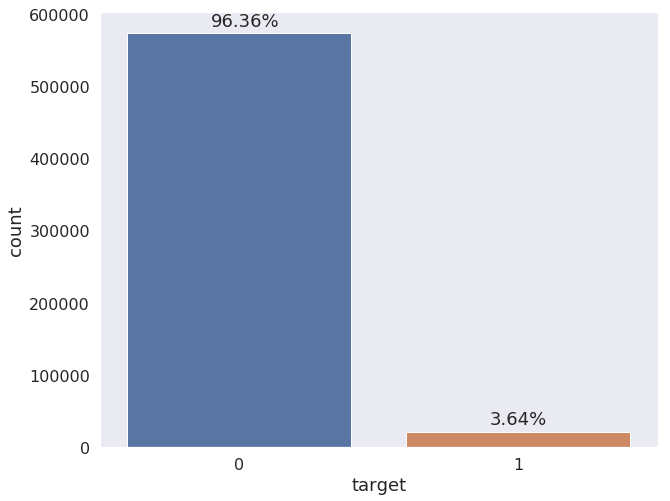

In [12]:
plt.figure(figsize=(10,8))

# fDistribution of 'target'
ax = sns.countplot('target', data=train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

In [13]:
train['target'].value_counts()


0    573518
1     21694
Name: target, dtype: int64

In [0]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [15]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,float64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,float64
ps_ind_05_cat,input,nominal,True,float64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [16]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [17]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,11
3,input,nominal,14
4,input,ordinal,15
5,target,binary,1


In [0]:
col_ordinal   = meta[(meta.level == 'ordinal') & (meta.keep)].index
col_nominal   = meta[(meta.level == 'nominal') & (meta.keep)].index
col_internval = meta[(meta.level == 'interval') & (meta.keep)].index
col_binary    = meta[(meta.level == 'binary') & (meta.keep) & (meta.role != 'target')].index

# Data Visualisation



In [0]:
#v = meta[(meta.level == 'nominal') & (meta.keep)].index

#for f in v:
 #   plt.figure()
  #  fig, ax = plt.subplots(figsize=(10,5))
    # Calculate the percentage of target=1 per category value
   # cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    #cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    #sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    #plt.ylabel('% target', fontsize=18)
   # plt.xlabel(f, fontsize=18)
 #   plt.tick_params(axis='both', which='major', labelsize=18)
  #  plt.show();

In [0]:
def get_meta(train):
    data = []
    for col in train.columns:
        # Defining the role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif train[col].dtype == np.float64:
            level = 'interval'
        elif train[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = train[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [0]:
meta_data = get_meta(train)


In [22]:
meta_counts = meta_data\
                    .groupby(['role', 'level'])\
                        .agg({'dtype': lambda x: x.count()})\
                            .reset_index()
display(meta_counts)

,role,level,dtype
0,id,nominal,1
1,input,binary,17
2,input,interval,11
3,input,nominal,14
4,input,ordinal,15
5,target,binary,1


In [0]:
col_ordinal   = meta_data[(meta_data.level == 'ordinal') & (meta_data.keep)].index
col_nominal   = meta_data[(meta_data.level == 'nominal') & (meta_data.keep)].index
col_internval = meta_data[(meta_data.level == 'interval') & (meta_data.keep)].index
col_binary    = meta_data[(meta_data.level == 'binary') & (meta_data.keep) & (meta_data.role != 'target')].index

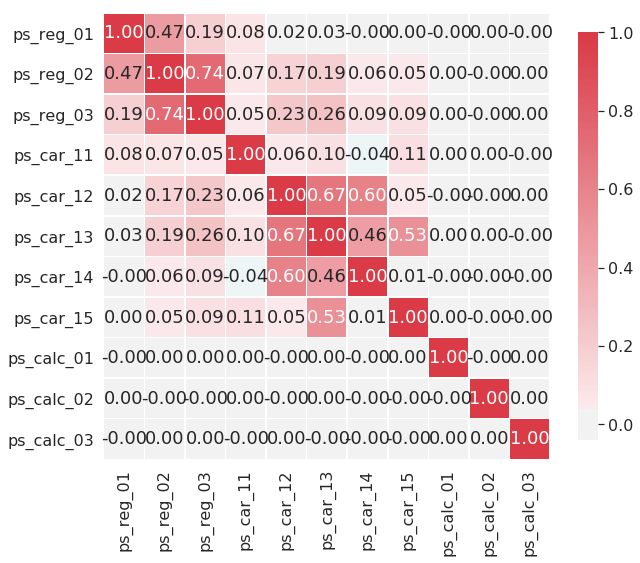

In [24]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

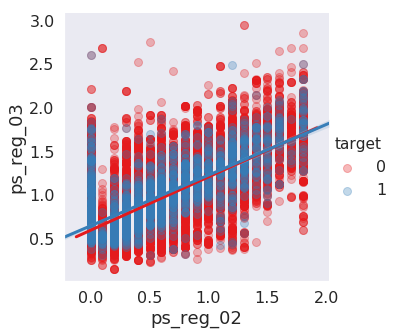

In [25]:
s = train.sample(frac=0.1)
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

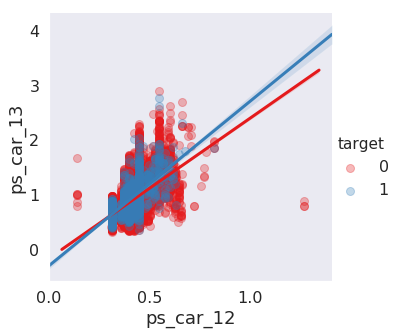

In [26]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

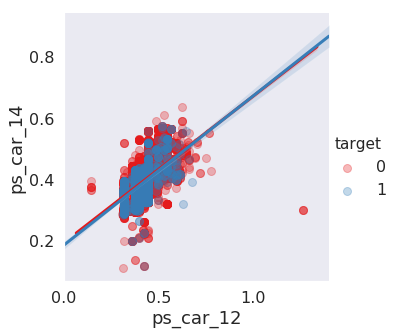

In [27]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

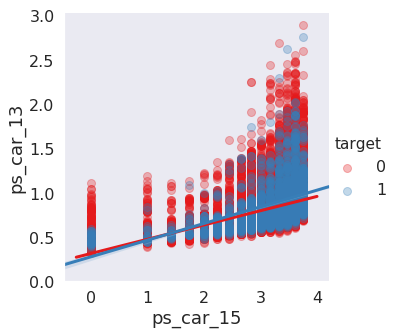

In [28]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

# Data Pre-Processing


## Missing Values




In [0]:
train.isnull().any()

In [0]:
missingValueColumns = train.columns[train.isnull().any()].tolist()

# cria um dataframe so com valores missing
df_null = train[missingValueColumns]

In [31]:
pp.pprint(missingValueColumns)

[   'ps_ind_02_cat',
    'ps_ind_04_cat',
    'ps_ind_05_cat',
    'ps_reg_03',
    'ps_car_01_cat',
    'ps_car_02_cat',
    'ps_car_03_cat',
    'ps_car_05_cat',
    'ps_car_07_cat',
    'ps_car_09_cat',
    'ps_car_11',
    'ps_car_12',
    'ps_car_14']


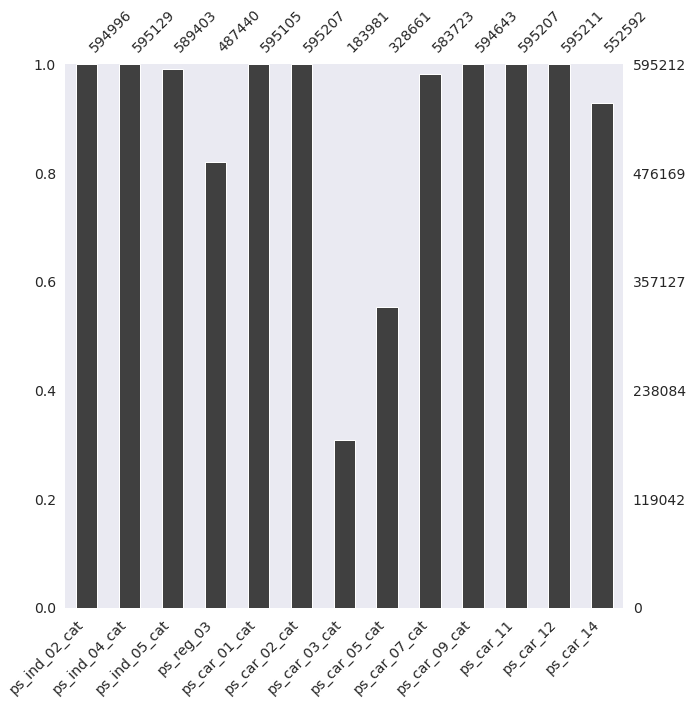

In [32]:
msno.bar(df_null,figsize=(10,10), fontsize=14, labels=True, color=(0.25, 0.25, 0.25))

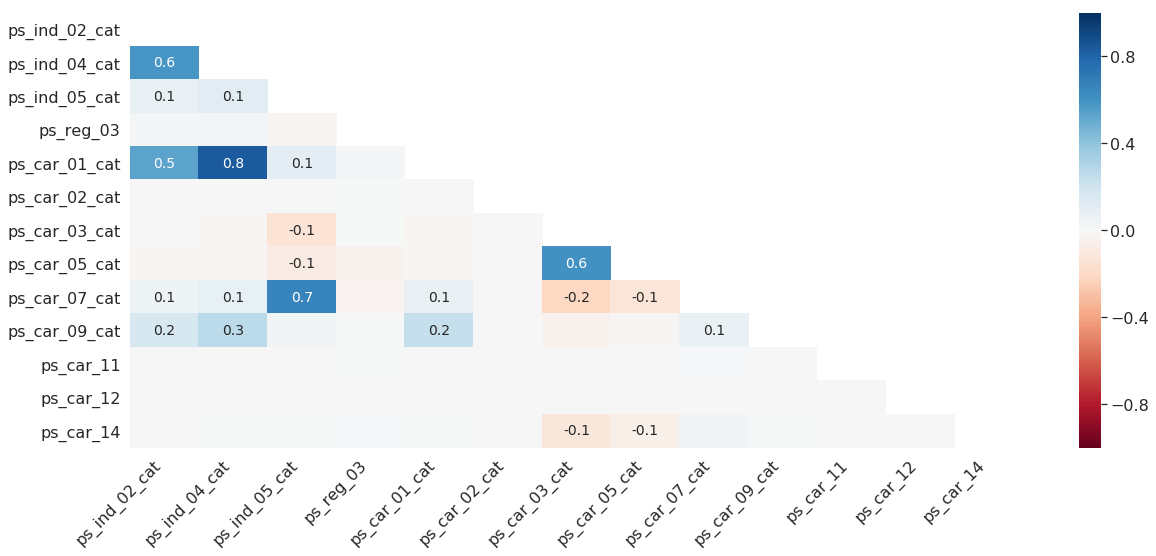

In [33]:
msno.heatmap(df_null,figsize=(20,8))

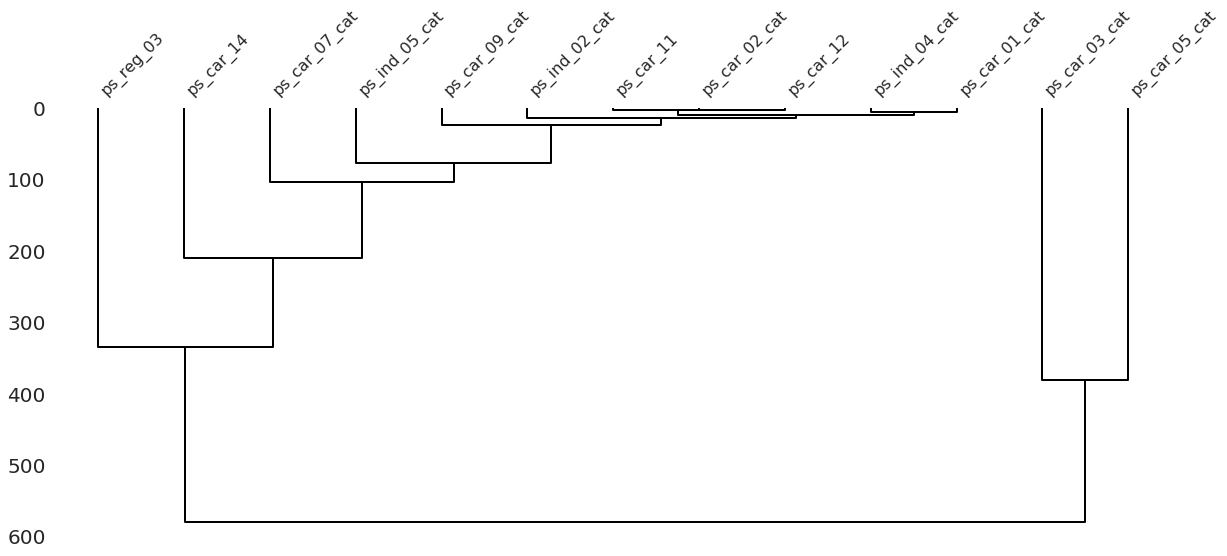

In [34]:
msno.dendrogram(df_null, figsize=(20,8))

In [0]:
sorted_data = msno.nullity_sort(df_null, sort='descending')


In [36]:
display(col_internval)

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02',
       'ps_calc_03'],
      dtype='object', name='varname')

In [37]:
corr_matrix = train[col_internval].corr()
display(corr_matrix)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.00,0.47,0.19,0.08,0.02,0.03,-0.00,0.00,-0.00,0.00,-0.00
ps_reg_02,0.47,1.00,0.74,0.07,0.17,0.19,0.06,0.05,0.00,-0.00,0.00
ps_reg_03,0.19,0.74,1.00,0.05,0.23,0.26,0.09,0.09,0.00,-0.00,0.00
ps_car_11,0.08,0.07,0.05,1.00,0.06,0.10,-0.04,0.11,0.00,0.00,-0.00
ps_car_12,0.02,0.17,0.23,0.06,1.00,0.67,0.60,0.05,-0.00,-0.00,0.00
ps_car_13,0.03,0.19,0.26,0.10,0.67,1.00,0.46,0.53,0.00,0.00,-0.00
ps_car_14,-0.00,0.06,0.09,-0.04,0.60,0.46,1.00,0.01,-0.00,-0.00,-0.00
ps_car_15,0.00,0.05,0.09,0.11,0.05,0.53,0.01,1.00,0.00,-0.00,-0.00
ps_calc_01,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00,0.00
ps_calc_02,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.00,0.00


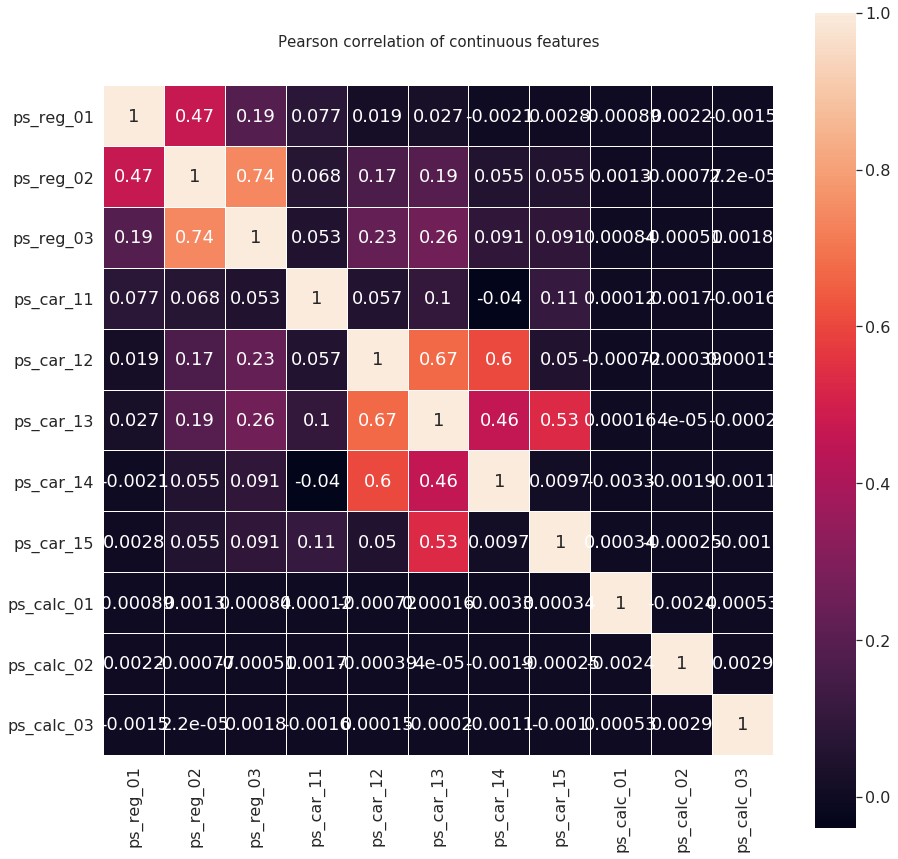

In [38]:
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train[col_internval].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            annot=True)

In [0]:
# fill all missing values with (-1)
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

## Sampling

In [0]:
#from sklearn.utils import shuffle
#desired_apriori=0.10

# Get the indices per target value
#idx_0 = train[train.target == 0].index
#idx_1 = train[train.target == 1].index

# Get original number of records per target value
#nb_0 = len(train.loc[idx_0])
#nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
#undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
#undersampled_nb_0 = int(undersampling_rate*nb_0)
#print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
#print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
#undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
#idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
#train = train.loc[idx_list].reset_index(drop=True)

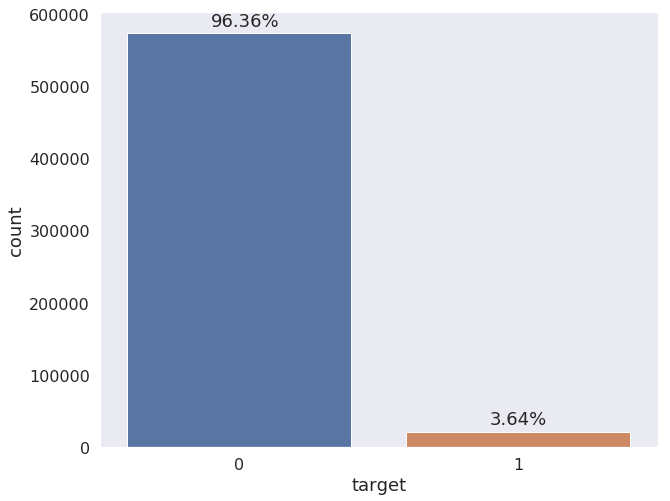

In [41]:
plt.figure(figsize=(10,8))

# fDistribution of 'target'
ax = sns.countplot('target', data=train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

In [42]:
train['target'].value_counts()


0    573518
1     21694
Name: target, dtype: int64

# Data Modelling

## Training sample split

In [0]:
def cross_val_model(X,y, model, n_splits=3):
    'Do split dataset and calculate cross_score'
    X = np.array(X)
    y = np.array(y)
    folds = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2017).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        print ("Fit %s fold %d" % (str(model).split('(')[0], j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=3, scoring='roc_auc')
        print("    cross_score: %.5f" % cross_score.mean())

## Feature Selection

In [0]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=10):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame"""
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sroted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [0]:
# create model
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [46]:
rf.fit(train.drop(['target'], axis=1), train.target)
features = train.drop(['target'], axis=1).columns.values
print("---Traing Done---")

---Traing Done---


In [47]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print 10 feature_importance in the rf randomForest
feature_importance

,feature,importance
0,ps_car_13,0.13
1,ps_ind_05_cat,0.07
2,ps_reg_03,0.07
3,ps_ind_17_bin,0.06
4,ps_ind_03,0.04
5,ps_reg_02,0.04
6,id,0.04
7,ps_car_07_cat,0.03
8,ps_car_04_cat,0.03
9,ps_car_14,0.03


In [0]:
def get_without_importance(df_feature_importance: 'dataframe') -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.01)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    print("-"*25, "FEATURE WITHOUT IMPORTANCE", "-"*25, end='\n\n')
    print(df_temp)
    return list_drop_col

In [0]:
def remove_without_importace(df: 'dataframe', list_without_imp: list) -> int:
    print(f'Columns before = {df.shape[1]}')
    
    for column in list_without_imp:
        del df[column]
        
    return print(f"Columns after = {df.shape[1]}")

In [50]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

------------------------- FEATURE WITHOUT IMPORTANCE -------------------------

Empty DataFrame
Columns: [feature, importance]
Index: []


## Random Forest Classifier

In [0]:
#RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['min_samples_split'] = 70
rf_params['min_samples_leaf'] = 30 # end tree necessary 30 leaf
rf_params['n_jobs'] = -1 # run all process

In [52]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# create model
rf_model = RandomForestClassifier(**rf_params)

# training model
X = train.drop('target',axis=1)
y = train['target']

In [54]:
# split dataset and calculate cross_score
cross_val_model(X, y, rf_model)

Fit RandomForestClassifier fold 1
    cross_score: 0.62391
Fit RandomForestClassifier fold 2
    cross_score: 0.59716
Fit RandomForestClassifier fold 3
    cross_score: 0.56916


## Test Data

In [0]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [61]:
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = id_test
submission['target'] = rf_model.predict_proba(test)[:, 1] # get all rows in the column 'id'

save_data_clenning(df = submission,
                   path = '/content/kaggle_submission.csv')

'Data storage!'